In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn.csv')
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',len(df))
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


checking Duplicates

In [3]:
df.drop_duplicates()
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
df[df.duplicated()]

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn


Data Cleaning 

In [5]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [7]:
df['day.charge'].unique()

array(['45.07', '27.47', '41.38', '50.9', '28.34', '37.98', '37.09',
       '26.69', '31.37', '43.96', '21.95', '31.91', 'Nan', '26.62',
       '20.52', '56.59', '33.39', '32.42', '32.25', '38.15', '26.37',
       '10.61', '31.11', '18.77', '13.79', '21.13', '36.21', '32.3',
       '20.28', '14.42', '38.44', '36.04', '42.43', '30.06', '37.4',
       '24.87', '22.24', '34.66', '23.87', '21.47', '29.43', '21.22',
       '14.59', '26.18', '20.55', '35.92', '27.05', '22.64', '32.62',
       '37.5', '31.64', '27.23', '25.67', '29.84', '21.57', '33.73',
       '25.3', '38.98', '32.66', '45.66', '32.93', '30.72', '22.3',
       '25.18', '42.76', '21.28', '35.97', '30.41', '41.11', '38.23',
       '42.26', '34.58', '40.09', '26.71', '51.05', '10.47', '36.4',
       '28.93', '34.19', '36.62', '28.15', '42.42', '35.8', '30.48',
       '26.84', '36.43', '26.2', '40.44', '24.46', '42.99', '30.45',
       '47.33', '27.22', '33.69', '36.06', '42.81', '27.4', '30.31',
       '25.79', '22.95', '28.99'

In [8]:
df[df['day.charge'] == 'Nan']

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
12,13,IA,area_code_408,168,no,0,no,11.2,2,3.02,128.8,96,Nan,104.9,71,8.92,141.1,128,6.35,1,no
27,28,MT,area_code_408,54,no,0,no,14.7,4,3.97,134.3,73,Nan,155.5,100,13.22,102.1,68,4.59,3,no
47,48,DE,area_code_408,142,no,0,no,7.4,5,2.00,187.0,133,Nan,134.6,74,11.44,242.2,127,10.90,2,no
4407,4408,TN,area_code_415,125,no,0,no,7.7,3,2.08,138.5,96,Nan,159.7,117,13.57,212.7,91,9.57,2,no
4755,4756,OK,area_code_408,17,no,0,no,14.8,5,4.00,180.4,121,Nan,228.5,111,19.42,199.5,99,8.98,0,no
4965,4966,NC,area_code_408,92,no,0,no,10.7,2,2.89,192.1,87,Nan,193,122,16.41,133.4,79,6.00,1,no
4992,4993,MT,area_code_415,83,no,0,no,10.3,6,2.78,188.3,70,Nan,243.8,88,20.72,213.7,79,9.62,0,no


In [9]:
df['eve.mins'].unique()

array(['197.4', '195.5', '121.2', '61.9', '148.3', '220.6', '348.5',
       '103.1', '351.6', '222', '228.5', '163.4', '104.9', '247.6',
       '307.2', '317.8', '280.9', '218.2', '212.8', '159.5', '239.7',
       '169.9', '72.9', '137.3', '245.2', '277.1', '191.1', '155.5',
       '258.2', '215.1', '136.7', '201.5', '31.2', '252.4', '195',
       '217.3', '162.5', '223.7', '187.6', '271.8', '166.8', '203.9',
       '282.2', '165.3', '225.8', '213', '162.6', '134.6', '231.3',
       '217.2', '269.8', '211.1', '190.2', '267.5', '219.7', '249.3',
       '180', '75.3', '246.5', '177.4', '178.2', '246.1', '187.8',
       '162.9', '169.5', '206.4', '216.9', '169.1', '170.5', '188.2',
       '148.9', '226.7', '157.2', '223.3', '181', '77.1', '164.4',
       '155.2', '303.5', '204.8', '136.1', '259.7', '249.2', '225.9',
       '155', '208.5', '123.4', 'Nan', '194.9', '190.9', '173', '178.4',
       '190.6', '81', '213.3', '207.3', '209.4', '205.7', '252.2', '189',
       '183.6', '173.7', '18

In [10]:
df[df['eve.mins'] == 'Nan']

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
89,90,NJ,area_code_415,128,no,0,no,13.9,4,3.75,237.9,125,40.44,Nan,93,21.05,208.9,68,9.40,1,yes
102,103,VT,area_code_415,135,no,0,no,10.5,6,2.84,151.7,82,25.79,Nan,105,10.12,180.0,100,8.10,0,no
110,111,MI,area_code_408,120,no,0,no,8.3,8,2.24,165.0,100,28.05,Nan,83,26.96,119.2,86,5.36,1,no
159,160,FL,area_code_510,115,yes,24,no,9.6,4,2.59,142.1,124,24.16,Nan,129,15.59,164.8,114,7.42,1,no
231,232,OH,area_code_415,63,yes,36,yes,11.0,6,2.97,199.0,110,33.83,Nan,111,24.76,197.6,92,8.89,1,no
254,255,TX,area_code_415,97,no,0,yes,10.9,3,2.94,143.7,117,24.43,Nan,82,23.21,178.3,81,8.02,0,no
299,300,MN,area_code_415,94,no,0,no,6.6,5,1.78,181.5,98,30.86,Nan,88,16.99,287.7,114,12.95,1,no
345,346,VA,area_code_415,141,no,0,no,7.2,8,1.94,260.2,131,44.23,Nan,120,15.23,135.0,119,6.08,3,no
460,461,UT,area_code_415,90,no,0,no,9.6,5,2.59,261.8,128,44.51,Nan,104,18.75,136.6,91,6.15,1,no
557,558,TX,area_code_408,58,yes,20,no,9.5,2,2.57,194.5,110,33.07,Nan,89,18.16,236.6,92,10.65,1,no


In [11]:
df['day.charge'].str.isdigit().count()

5000

In [12]:
df['eve.mins'].str.isdigit().count()

5000

In [13]:
df['day.charge'] = df['day.charge'].replace('Nan',np.nan)

In [14]:
df['eve.mins'] = df['eve.mins'].replace('Nan',np.nan)

In [15]:
df.drop(['Unnamed: 0','state'],axis = 1 ,inplace = True)

In [16]:
df.isna().sum()

area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [17]:
df['eve.mins'].median()

201.0

In [18]:
df['eve.mins'] = df['eve.mins'].fillna(value=df['eve.mins'].median())

In [19]:
df['day.charge'].median()

30.62

In [20]:
df['day.charge'] = df['day.charge'].fillna(value=df['day.charge'].median())

In [21]:
df.isna().sum()

area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [22]:
df['day.charge'] = df['day.charge'].astype(float)
df['eve.mins'] = df['eve.mins'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area.code       5000 non-null   object 
 1   account.length  5000 non-null   int64  
 2   voice.plan      5000 non-null   object 
 3   voice.messages  5000 non-null   int64  
 4   intl.plan       5000 non-null   object 
 5   intl.mins       5000 non-null   float64
 6   intl.calls      5000 non-null   int64  
 7   intl.charge     5000 non-null   float64
 8   day.mins        5000 non-null   float64
 9   day.calls       5000 non-null   int64  
 10  day.charge      5000 non-null   float64
 11  eve.mins        5000 non-null   float64
 12  eve.calls       5000 non-null   int64  
 13  eve.charge      5000 non-null   float64
 14  night.mins      5000 non-null   float64
 15  night.calls     5000 non-null   int64  
 16  night.charge    5000 non-null   float64
 17  customer.calls  5000 non-null   i

EDA

In [24]:
obj = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj.append(i)
print(obj)

['area.code', 'voice.plan', 'intl.plan', 'churn']


In [25]:
num = []
for i in df.columns:
    if df[i].dtype != 'object':
        num.append(i)
print(num)

['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


In [26]:
df.nunique()

area.code            3
account.length     218
voice.plan           2
voice.messages      48
intl.plan            2
intl.mins          170
intl.calls          21
intl.charge        170
day.mins          1961
day.calls          123
day.charge        1961
eve.mins          1876
eve.calls          126
eve.charge        1659
night.mins        1853
night.calls        131
night.charge      1028
customer.calls      10
churn                2
dtype: int64

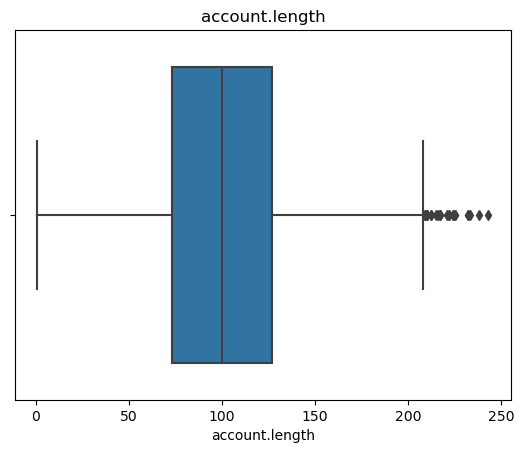

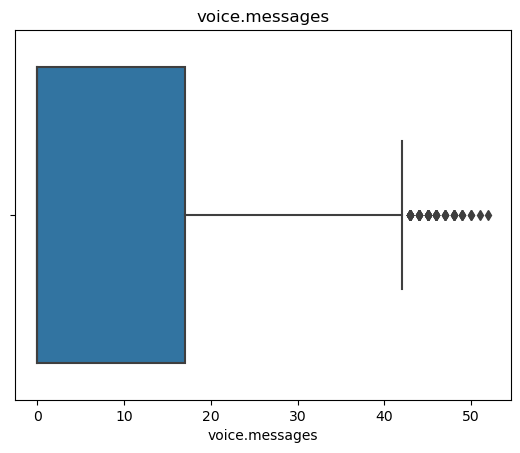

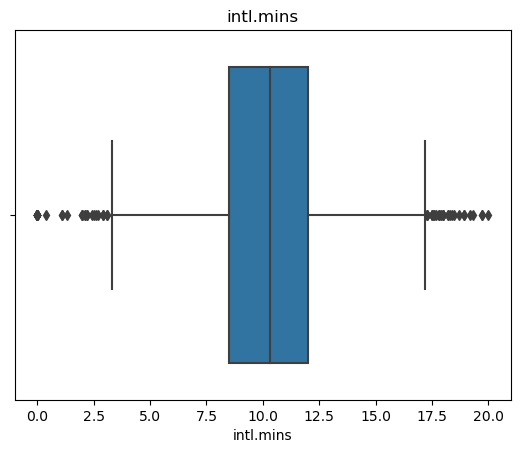

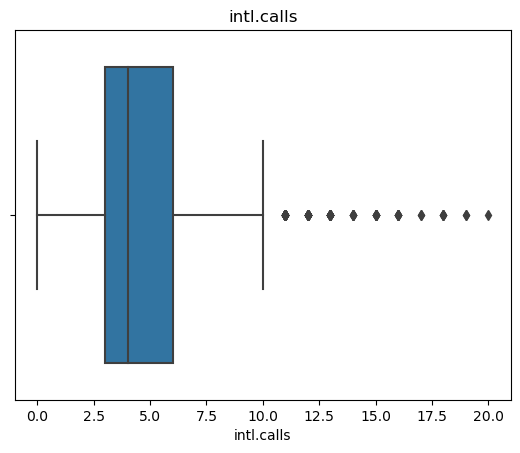

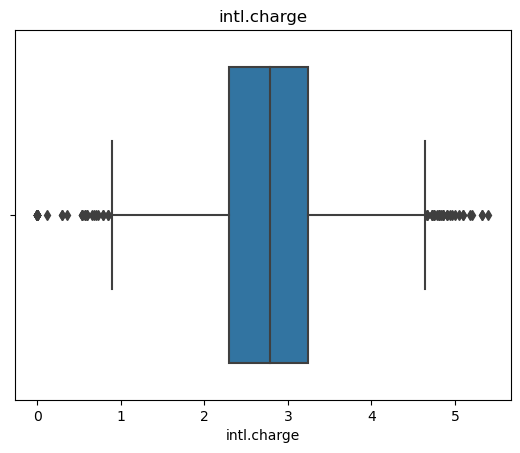

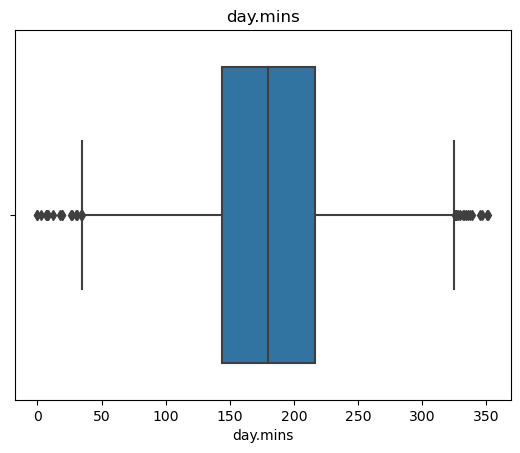

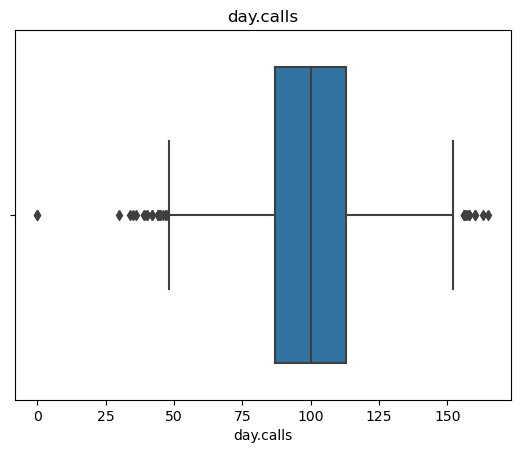

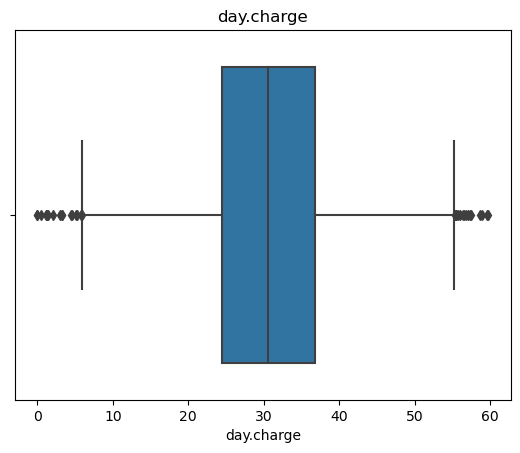

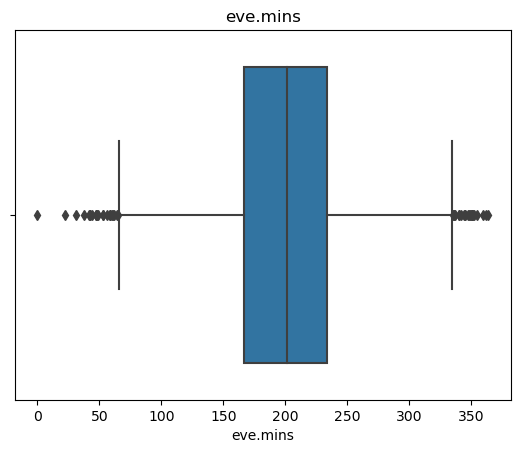

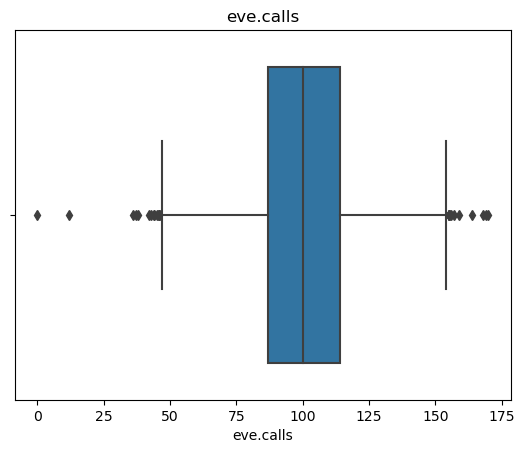

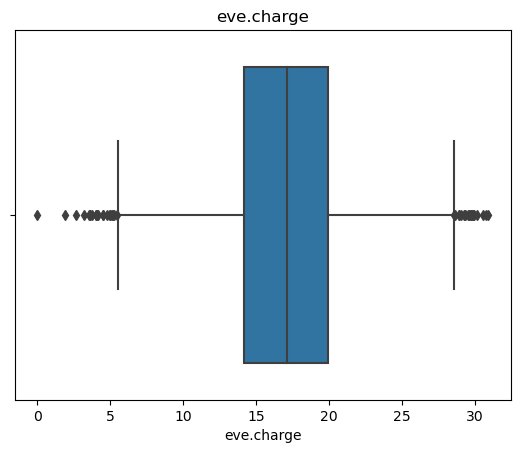

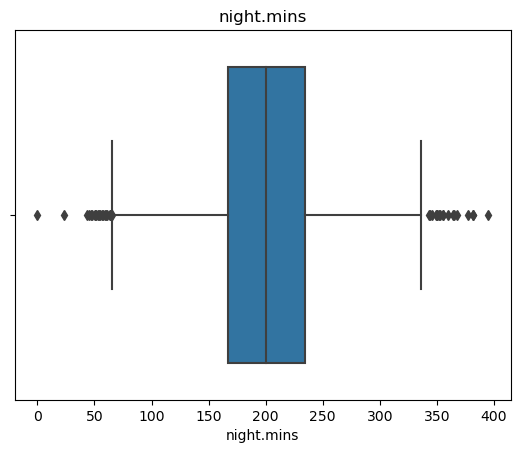

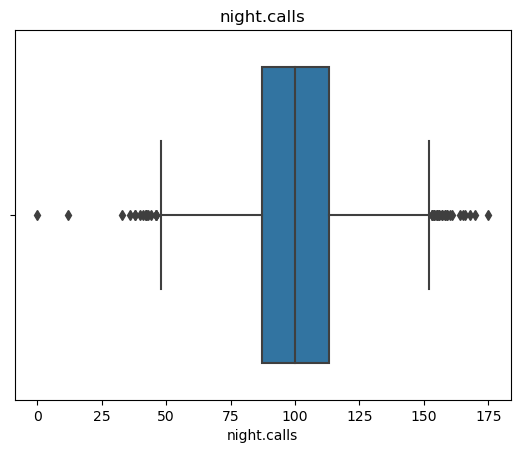

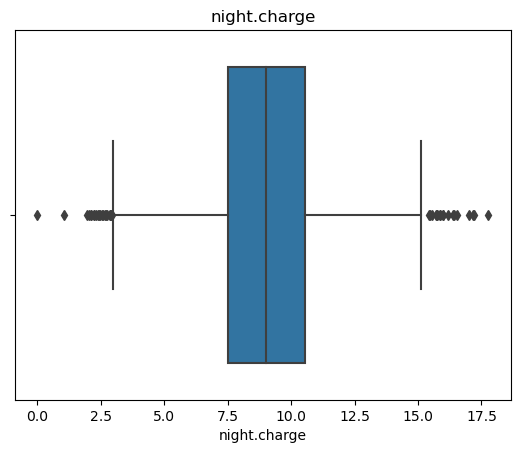

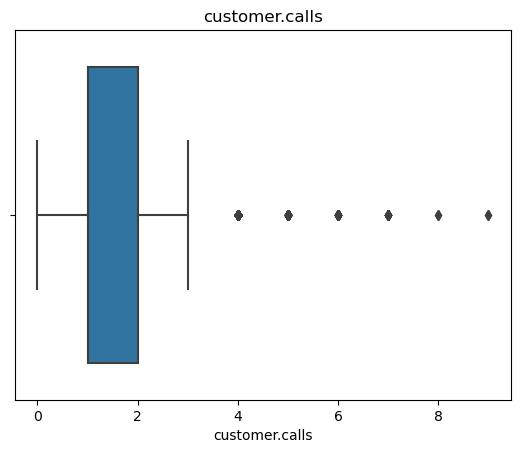

In [27]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

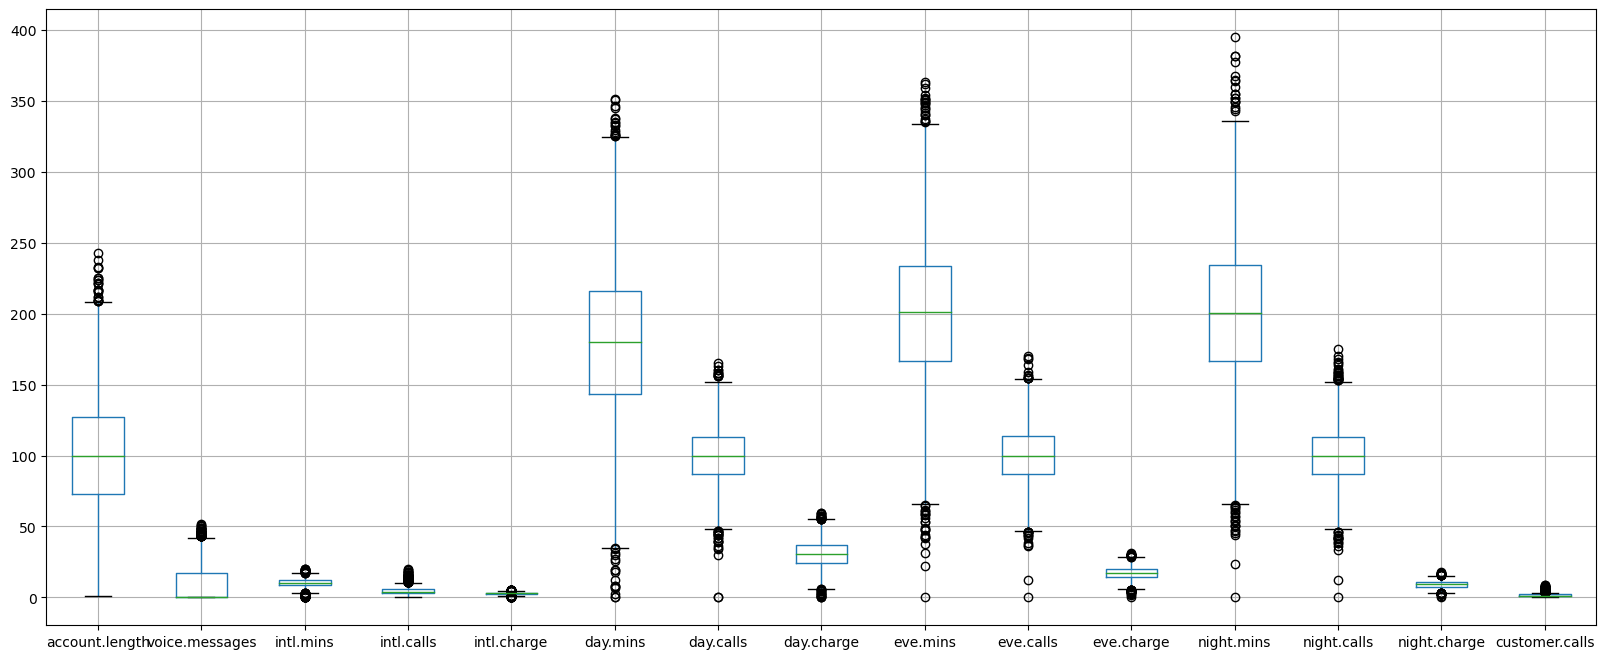

In [28]:
plt.figure(figsize = (20,8))
df.boxplot()
plt.show()

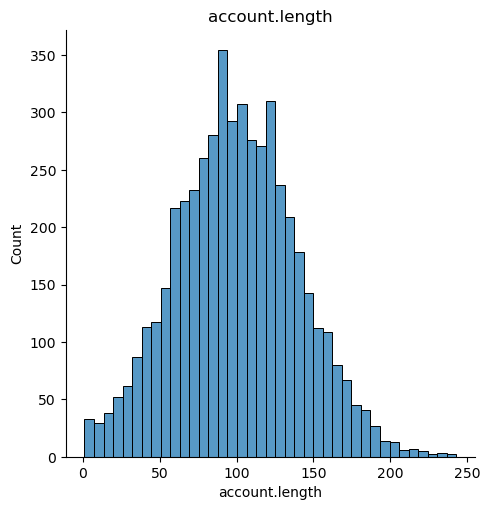

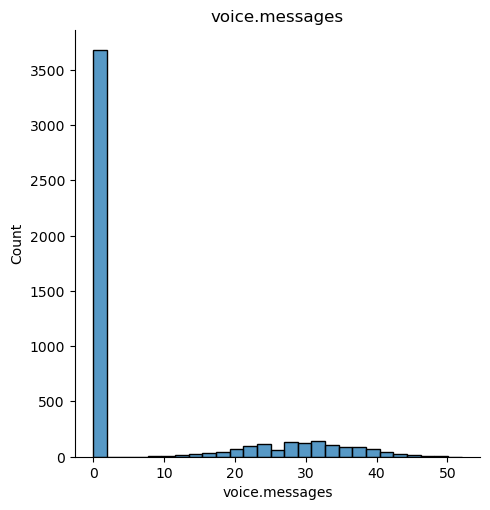

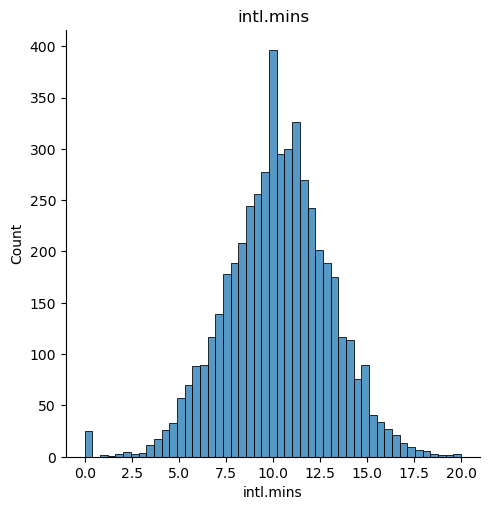

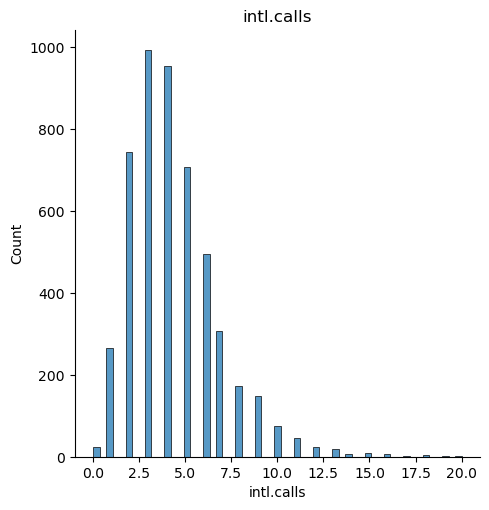

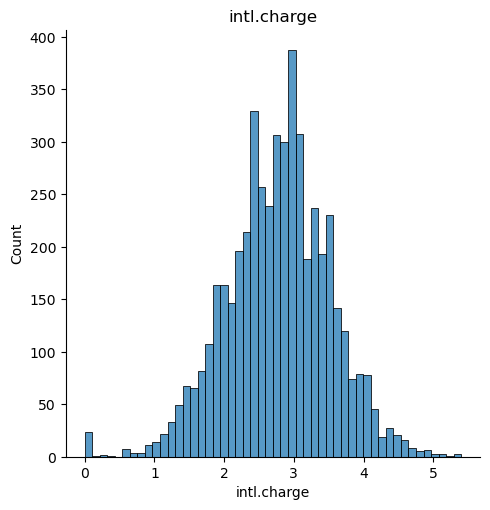

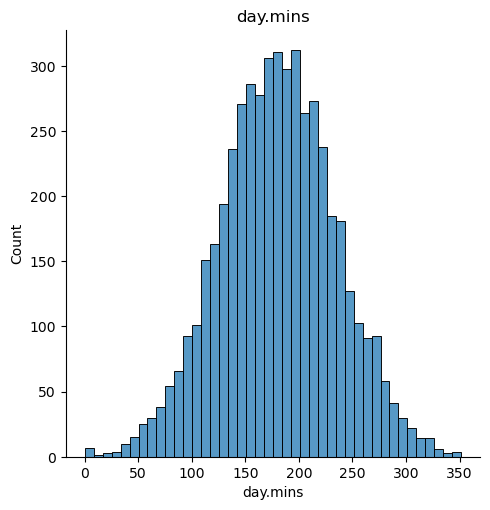

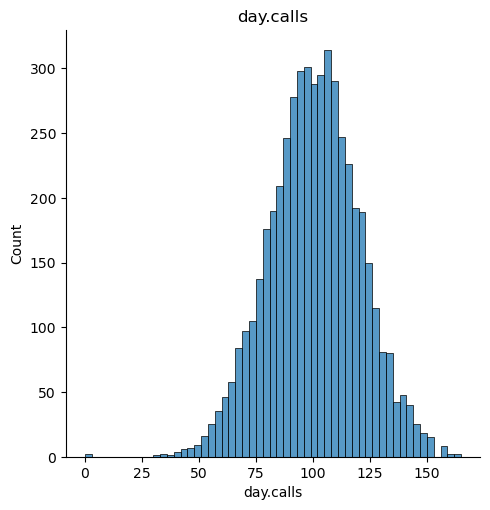

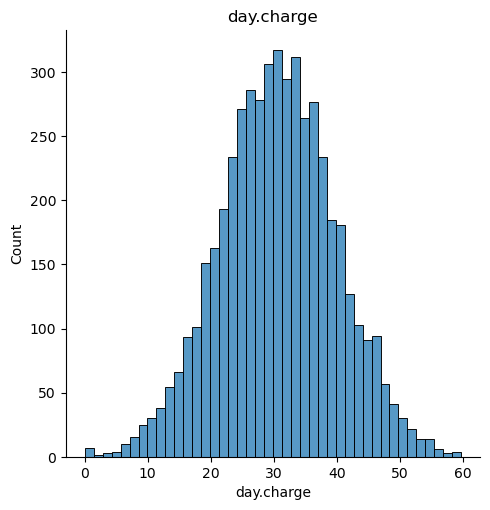

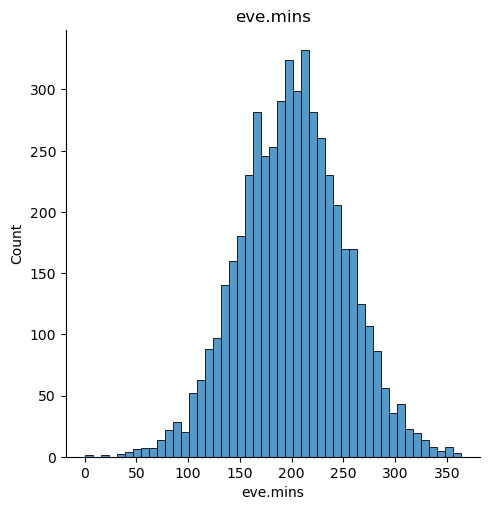

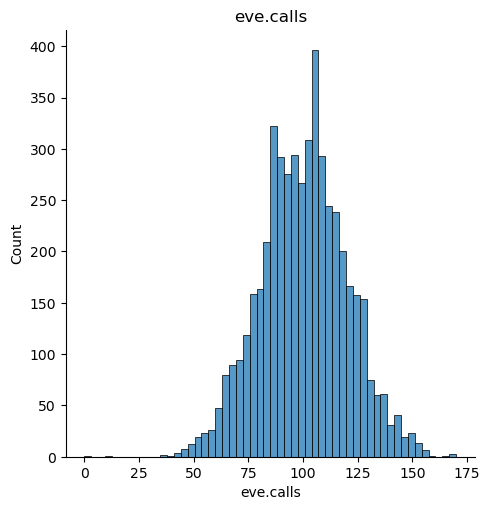

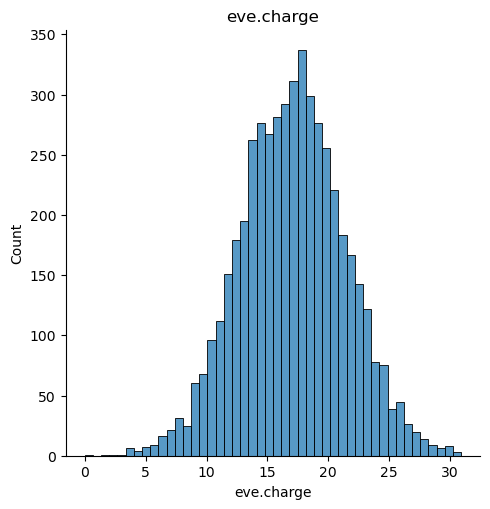

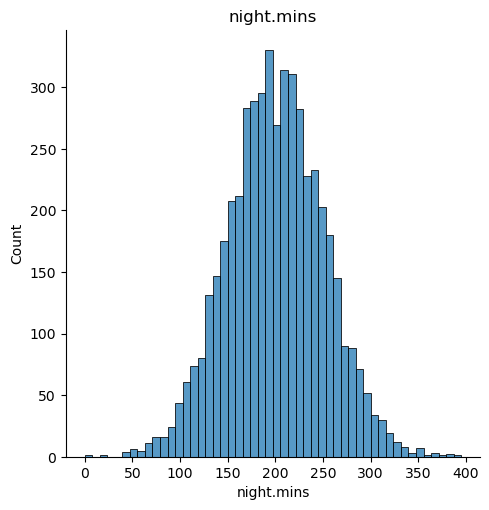

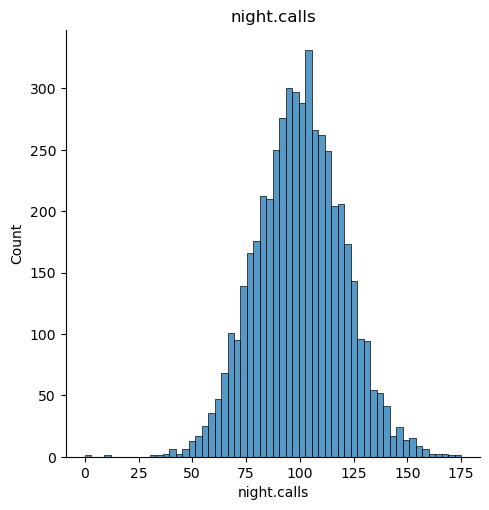

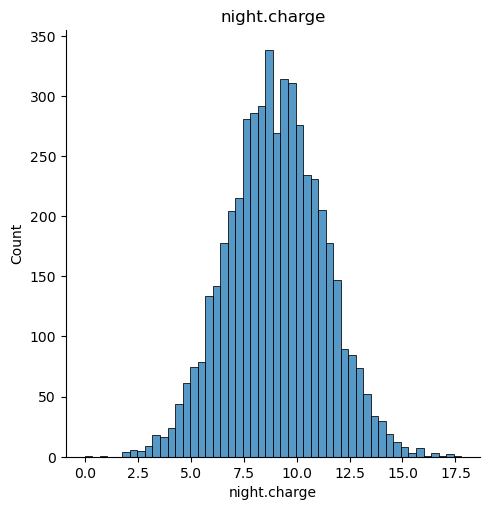

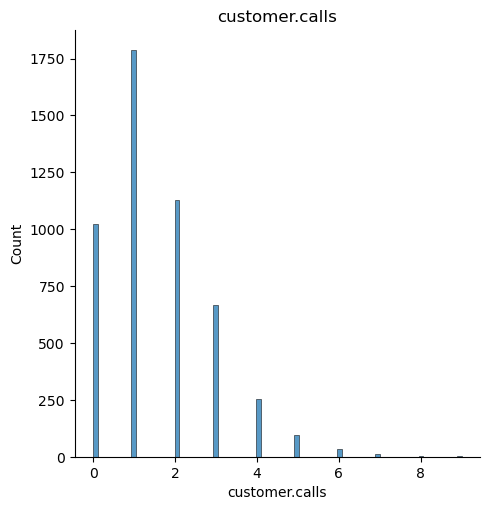

In [29]:
for i in num:
    sns.displot(df[i])
    plt.title(i)
    plt.show()

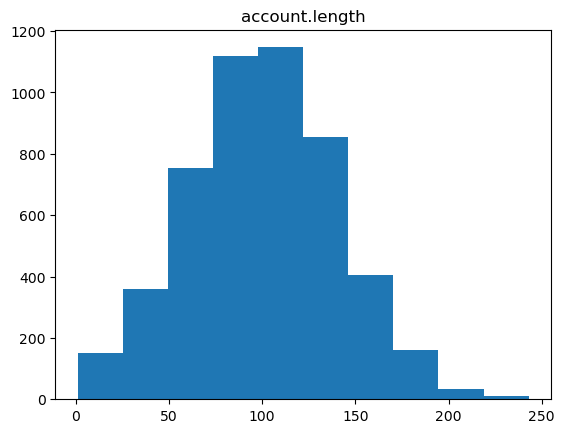

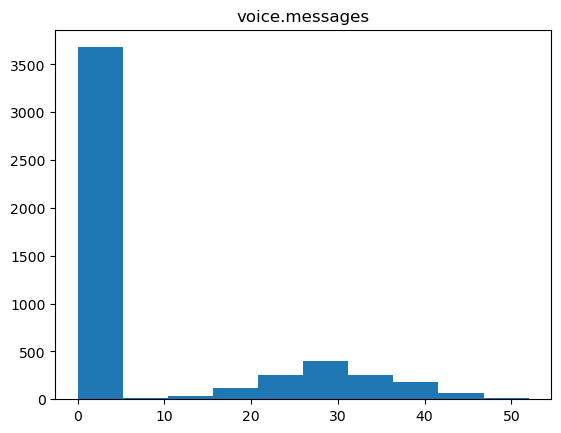

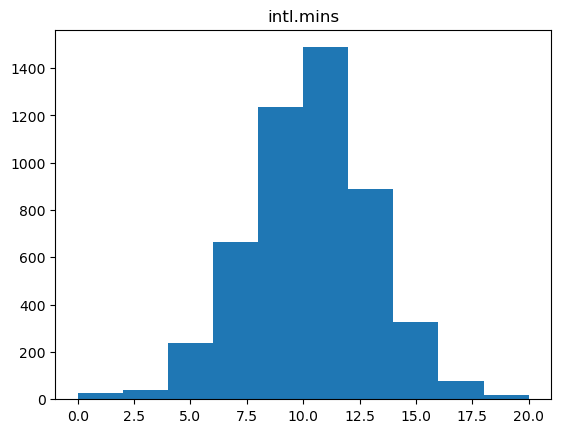

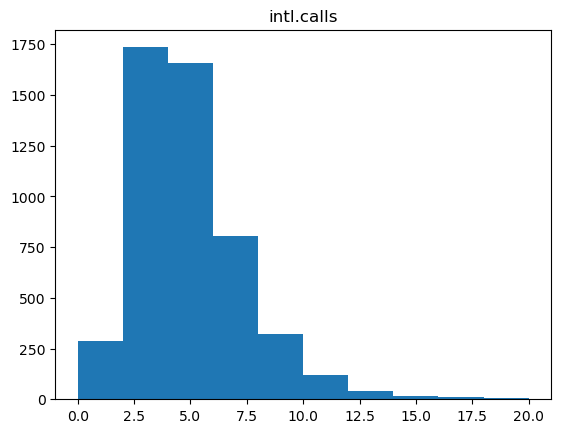

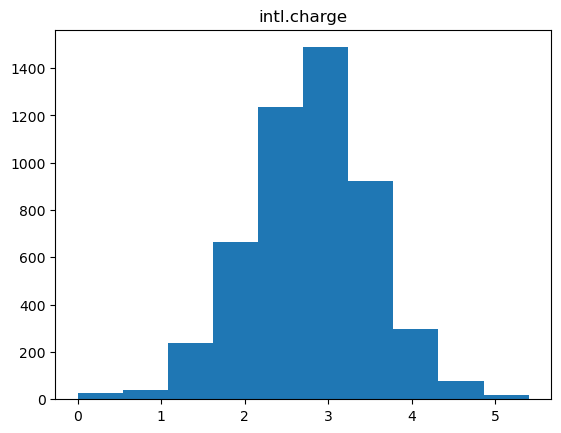

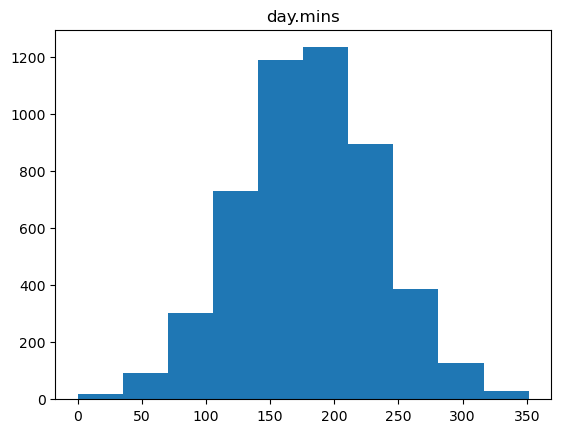

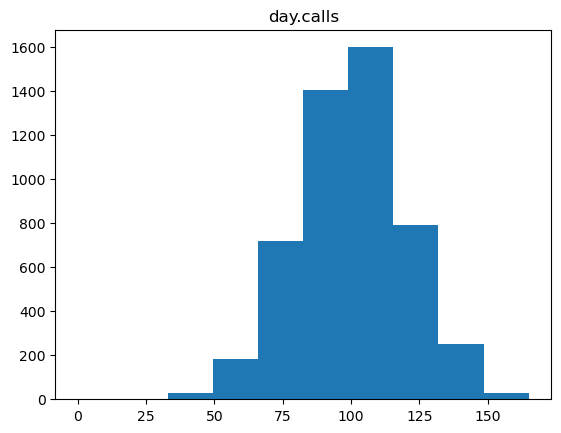

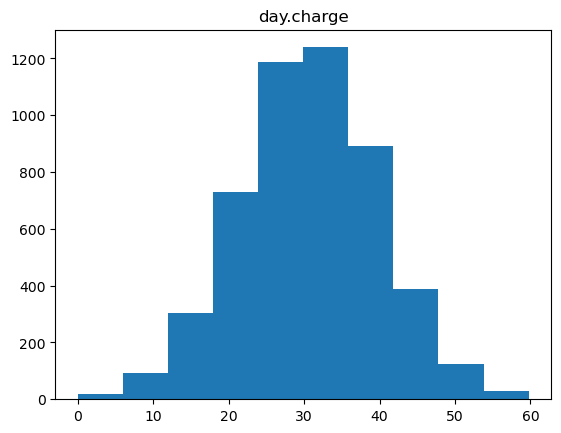

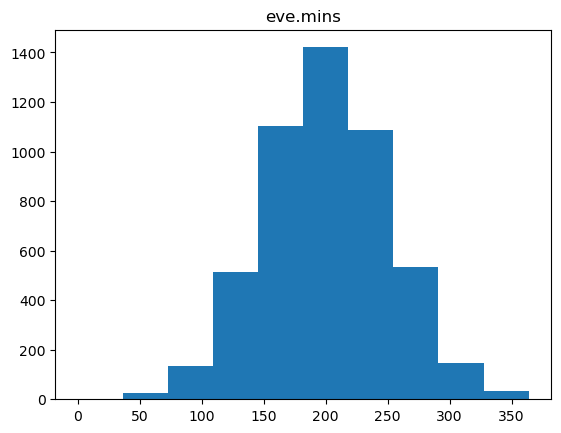

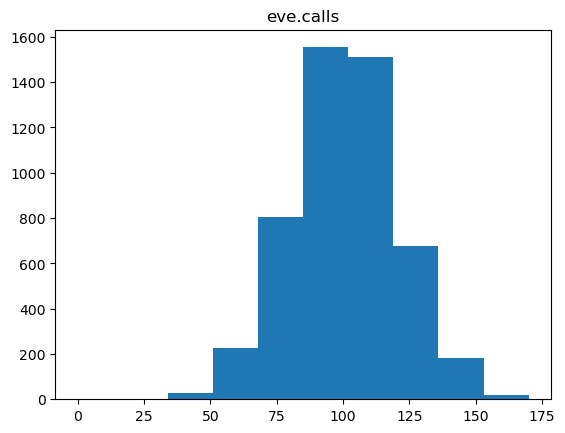

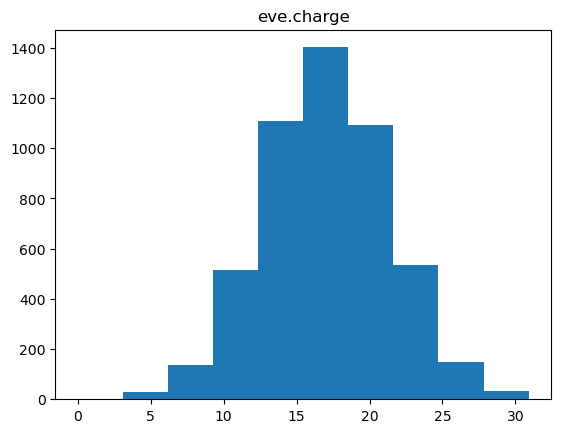

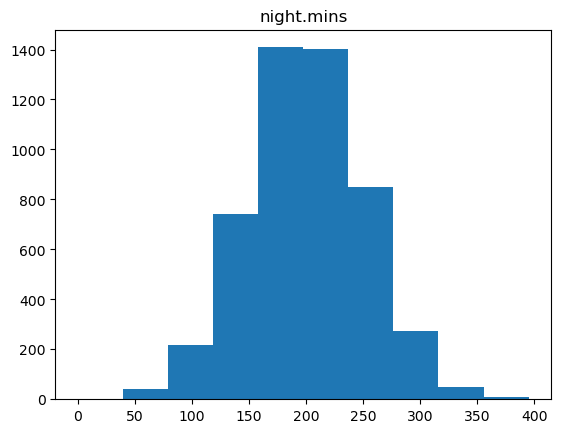

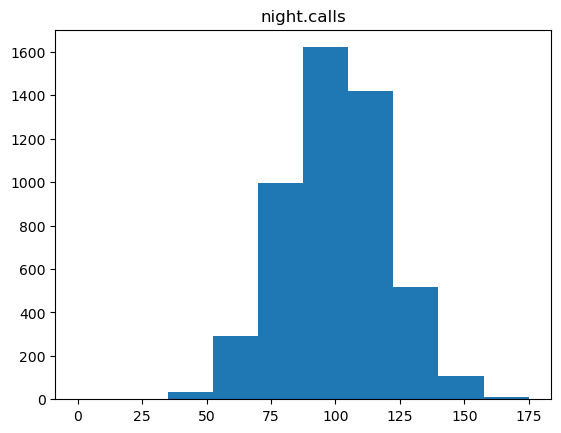

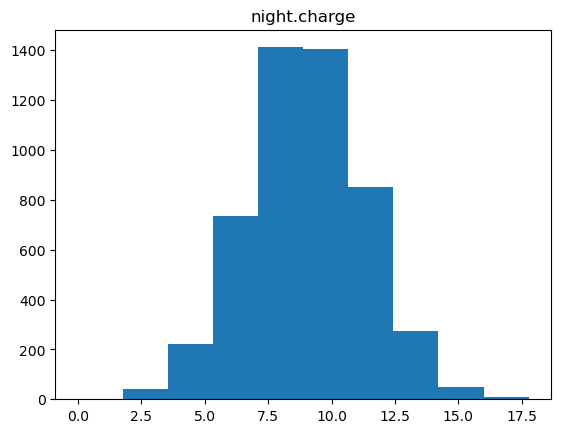

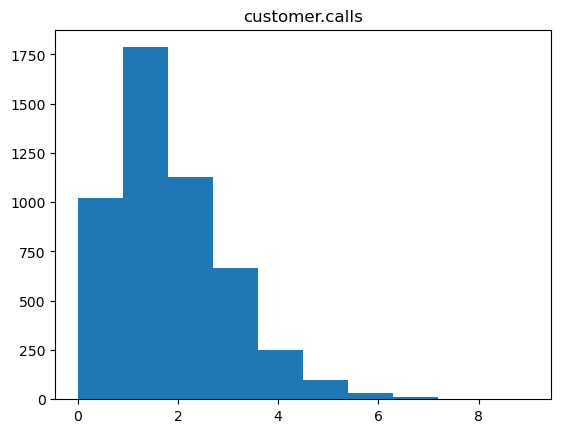

In [30]:
for i in num:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

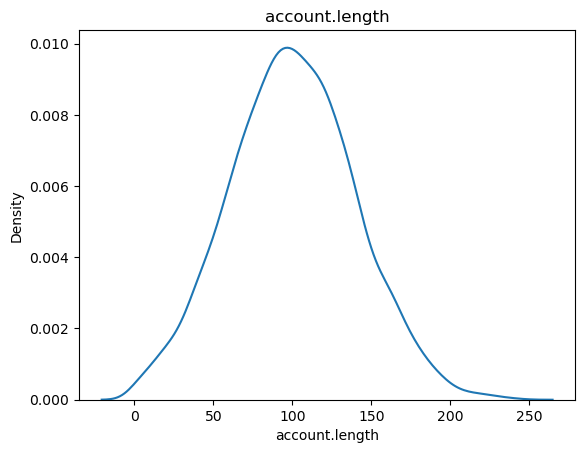

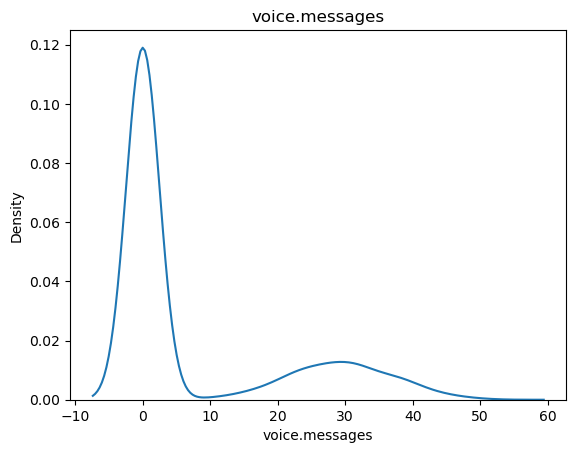

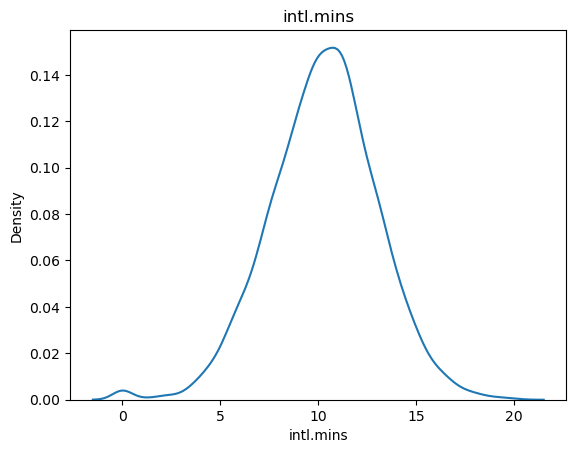

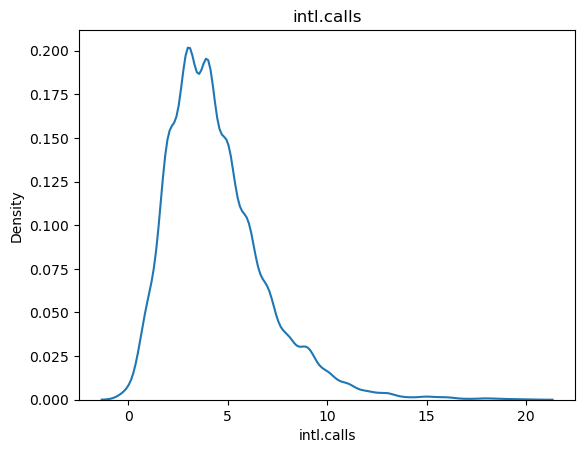

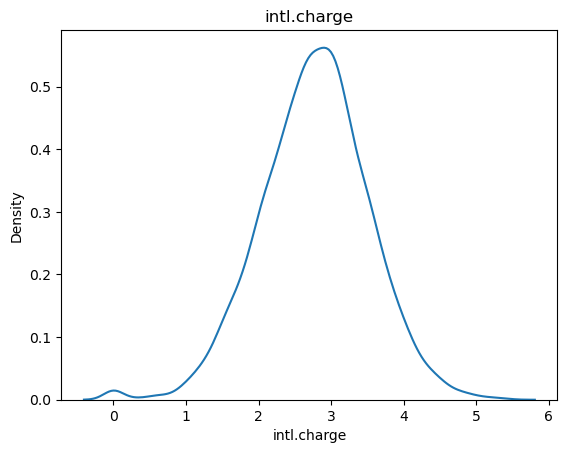

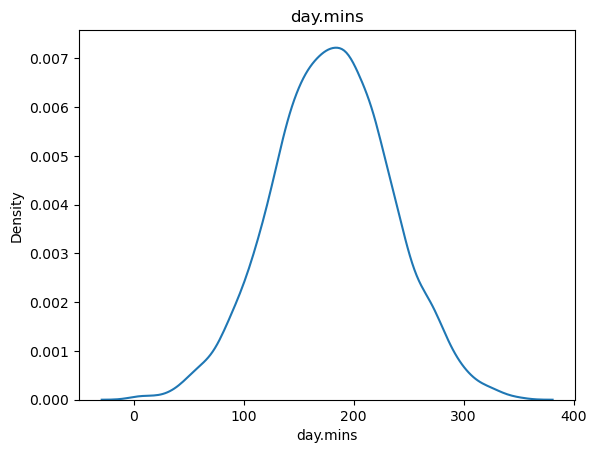

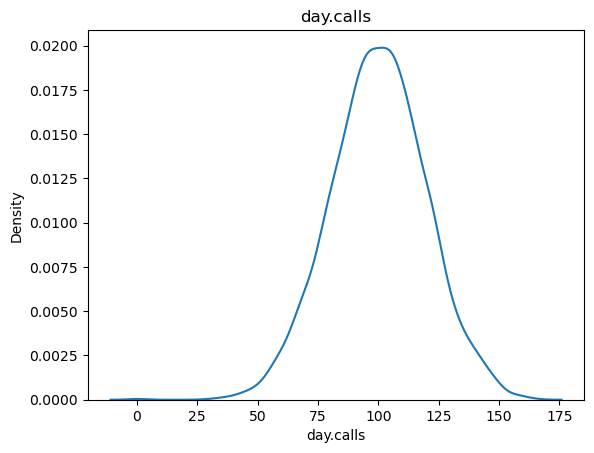

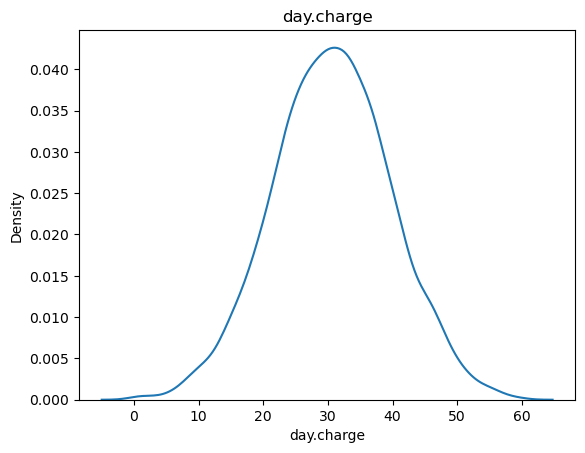

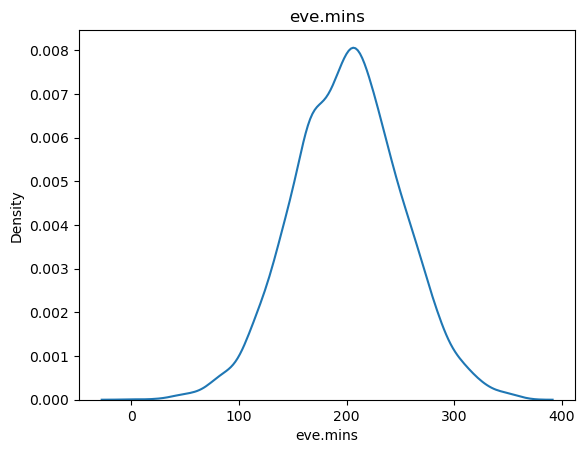

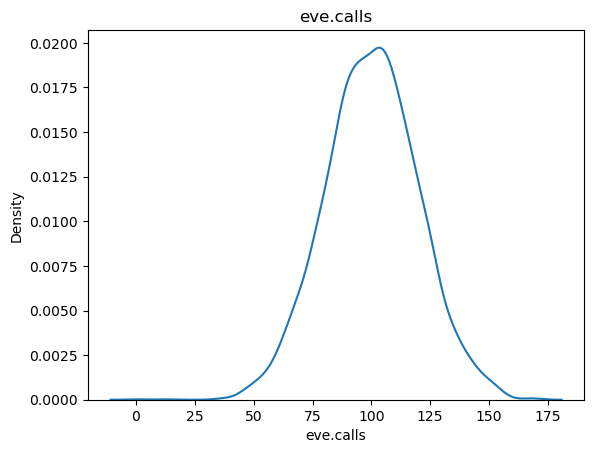

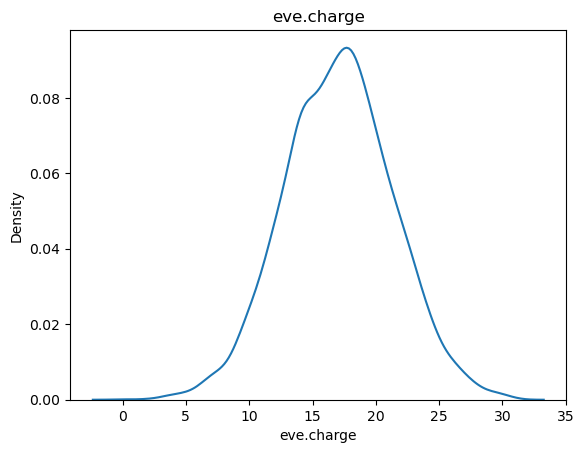

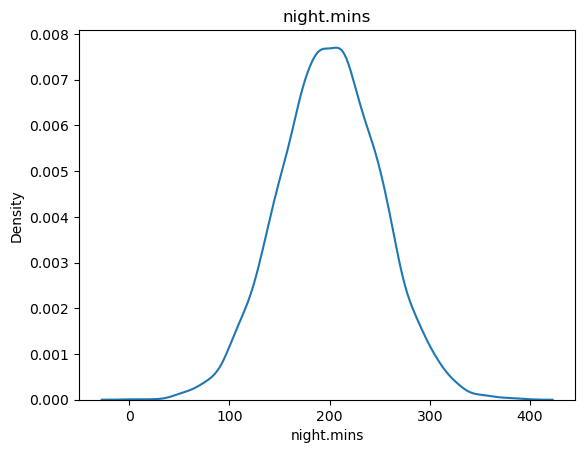

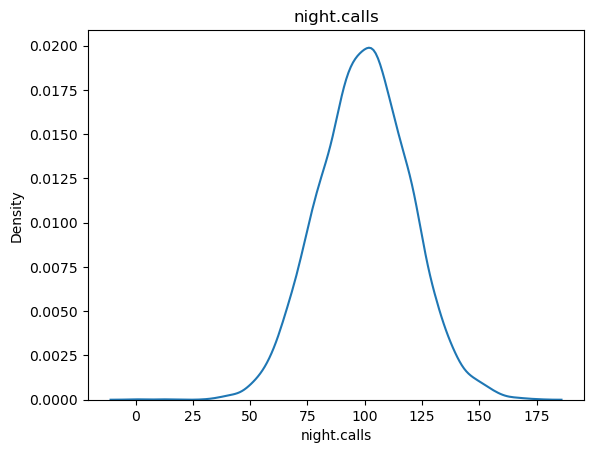

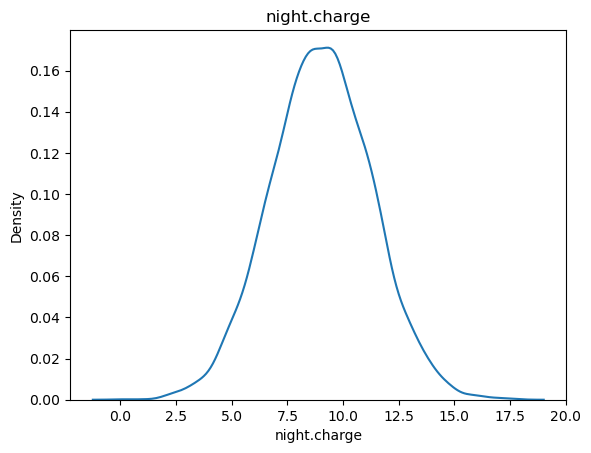

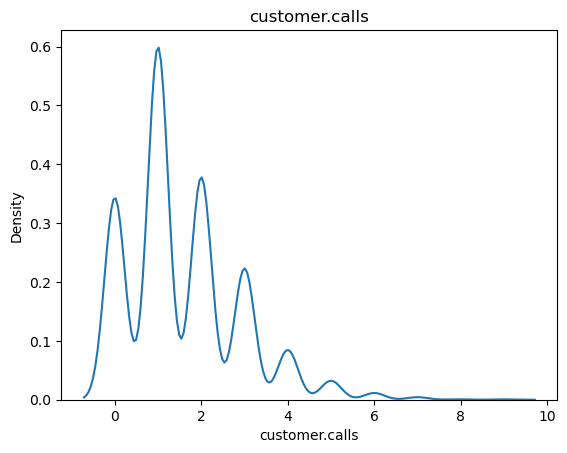

In [31]:
for i in num:
    sns.kdeplot(df[i],legend='churn')
    plt.title(i)
    plt.show()

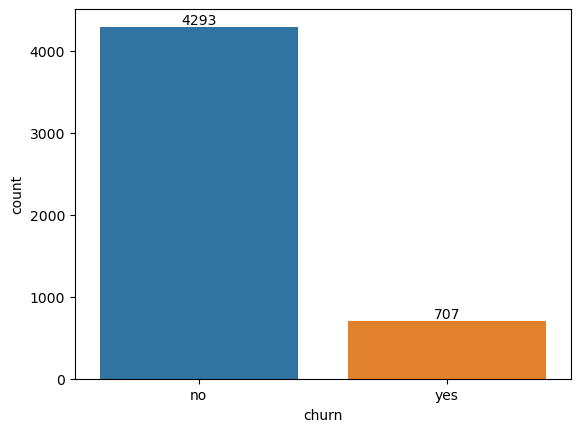

In [32]:
ax = sns.countplot(data=df, x='churn')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

area.code


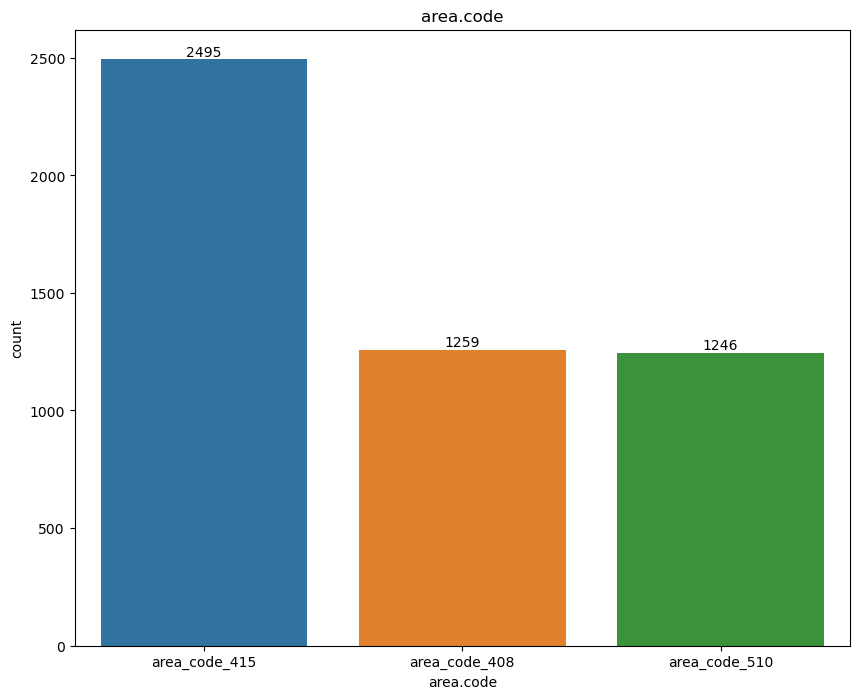

voice.plan


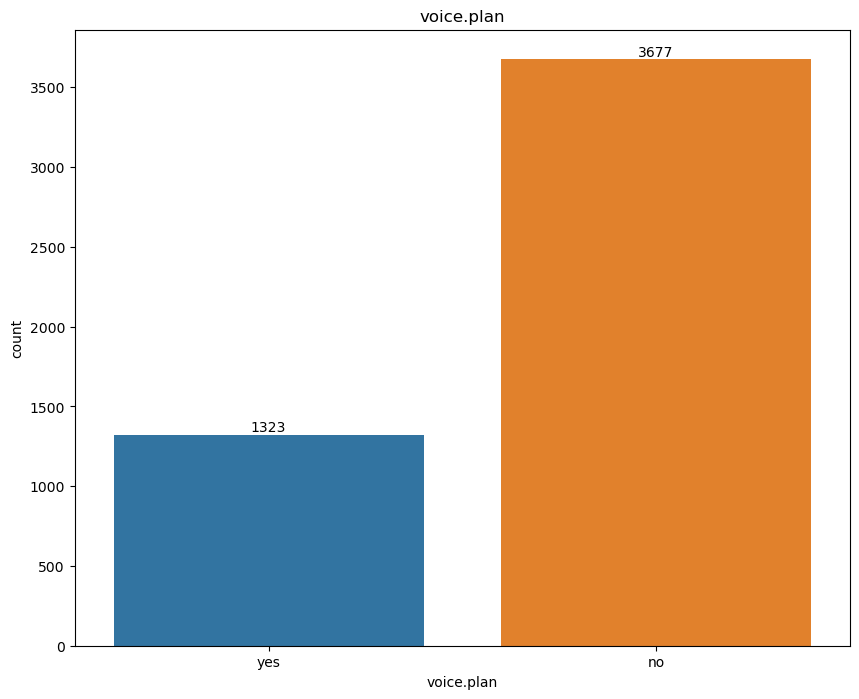

intl.plan


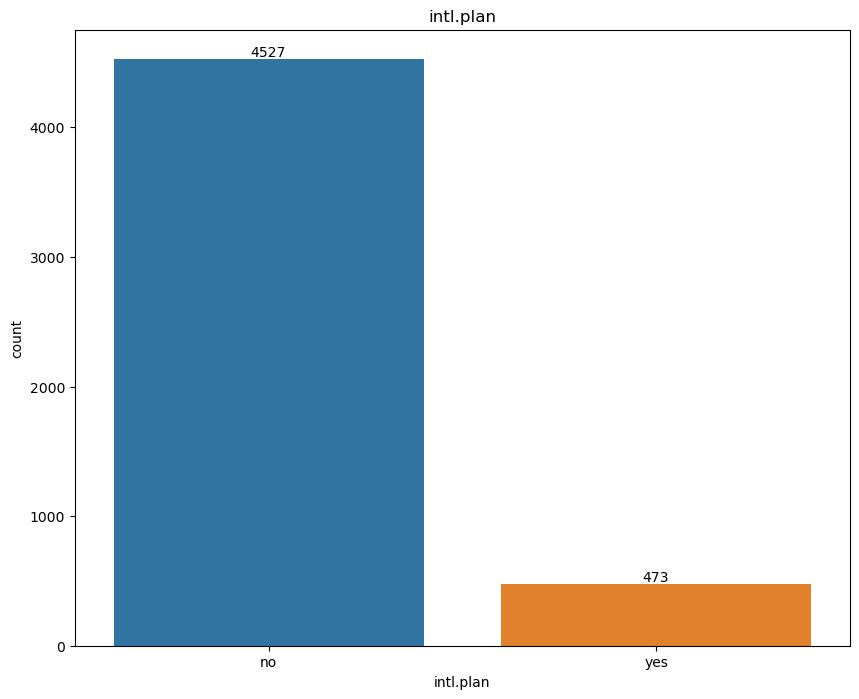

churn


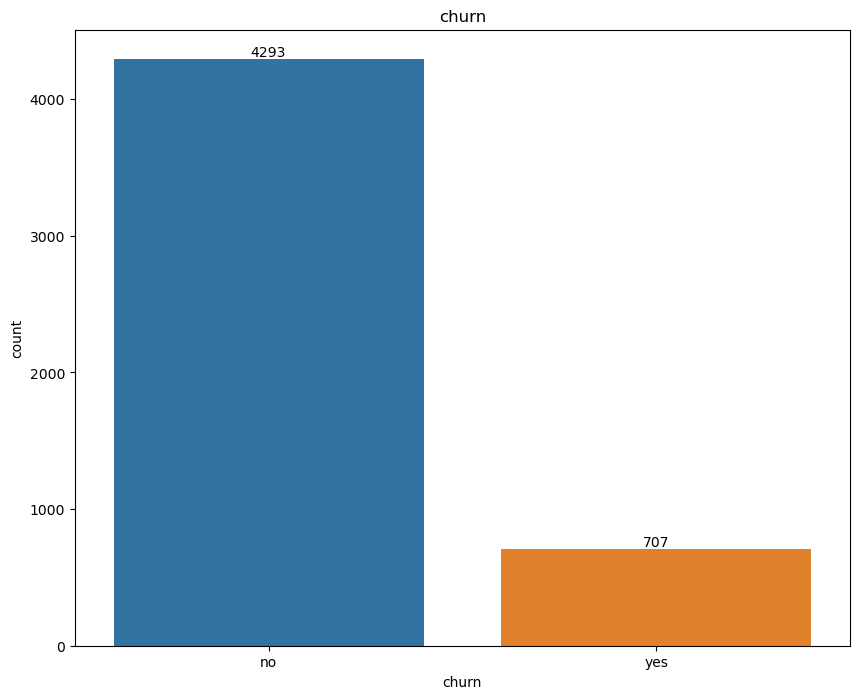

In [33]:
for i in obj:
    if obj != 'State':
        print(i)
        plt.figure(figsize = (10,8))
        ax = sns.countplot(df[i])
        for label in ax.containers:
            ax.bar_label(label) 
            plt.title(i)
            plt.show()

# Feature Engineering 

Heat map 

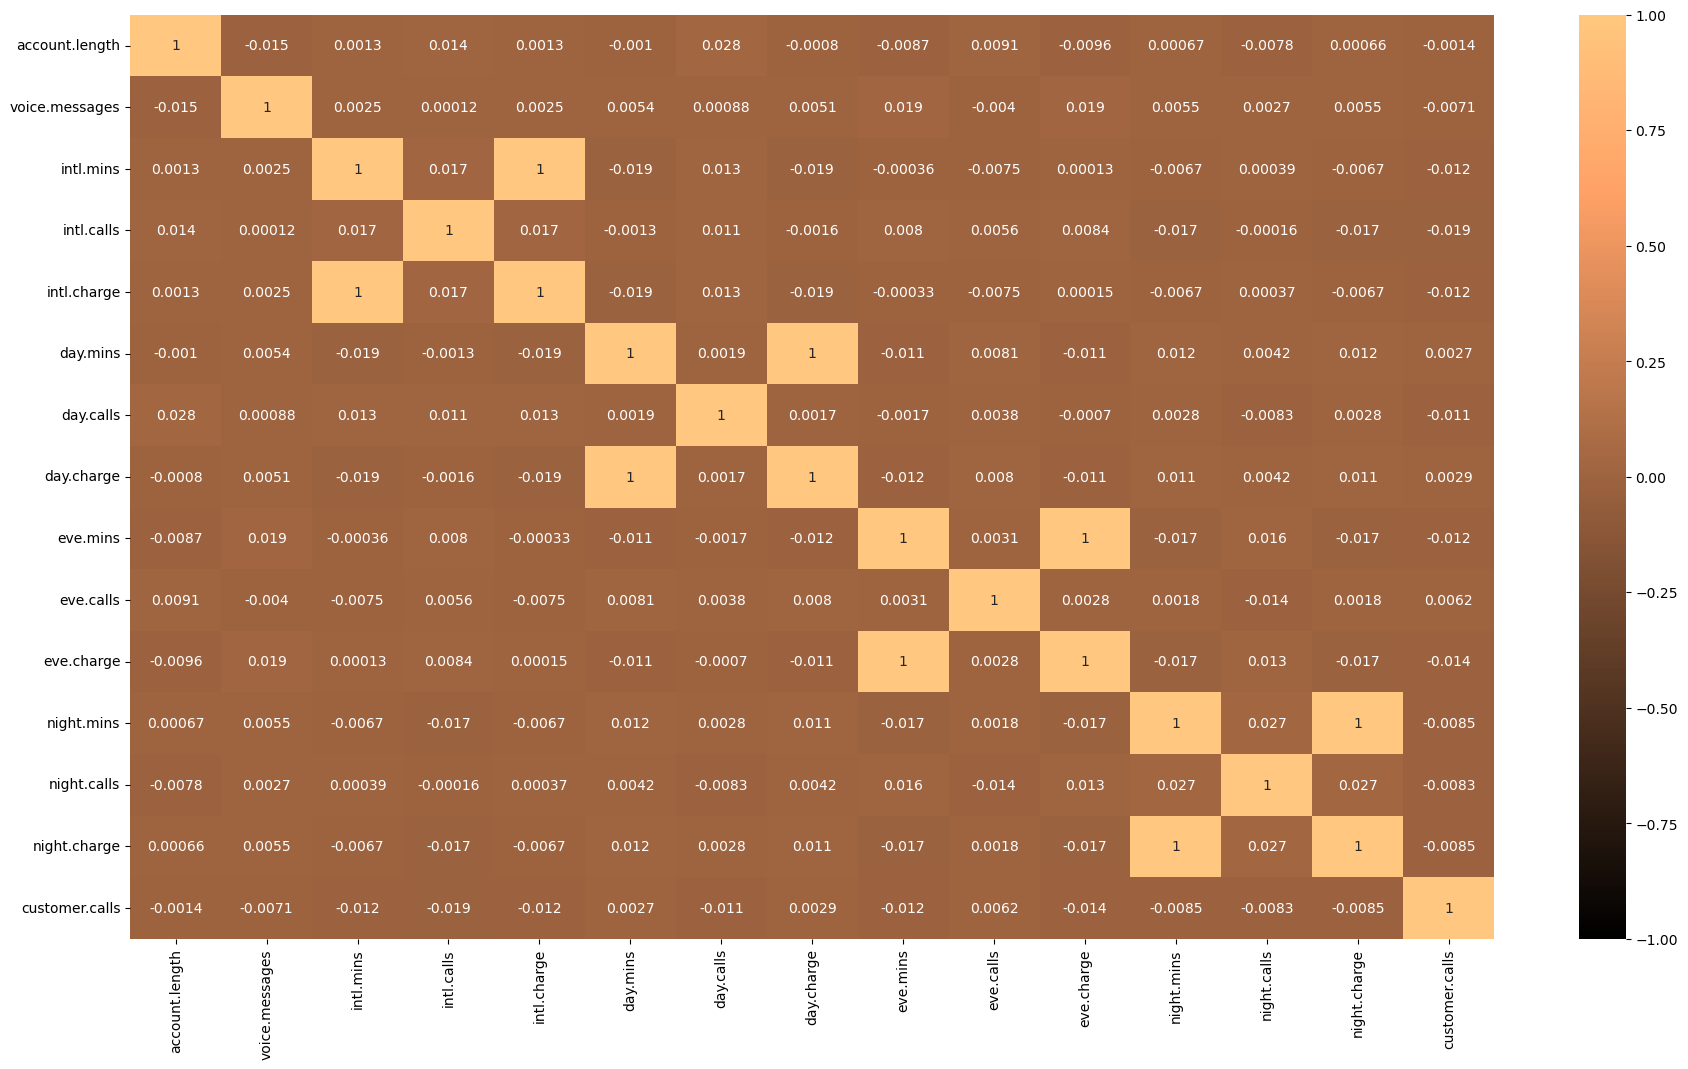

In [34]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot = True,vmin = -1,vmax = 1,cmap = 'copper')
plt.show()

intl.charge,day.charge,eve.charge,night.charge these are highly correleated

In [35]:
df.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


maping the  keys into numeric

In [36]:
df['voice.plan'] =df['voice.plan'].map({'yes':1,'no':0})
df['intl.plan'] =df['intl.plan'].map({'yes':1,'no':0})
df['churn'] =df['churn'].map({'yes':1,'no':0})

In [37]:
df.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,area_code_415,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,area_code_415,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,area_code_415,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,area_code_408,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,area_code_415,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['area.code'] = le.fit_transform(df['area.code'])

In [39]:
df.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
df.columns

Index(['area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [42]:
variables = df[['area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,2.958059e+00,area.code
1,7.107950e+00,account.length
2,1.534513e+01,voice.plan
3,1.498170e+01,voice.messages
4,1.110111e+00,intl.plan
5,1.011745e+06,intl.mins
6,4.190937e+00,intl.calls
7,1.012230e+06,intl.charge
8,2.639964e+04,day.mins
9,2.207737e+01,day.calls


in the above there is no fetaures value is not more than 8 so we consider every feature is important 

# feature_importance_

In [43]:
X = df.drop(['churn'],axis = 1)
y = df['churn']

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [45]:
print(selection.feature_importances_)

[0.0147718  0.02045808 0.03780773 0.01054881 0.06787547 0.04657599
 0.08790978 0.04533513 0.14282061 0.02088634 0.12288801 0.06675412
 0.01879252 0.07373259 0.03789392 0.0214161  0.03630539 0.12722759]


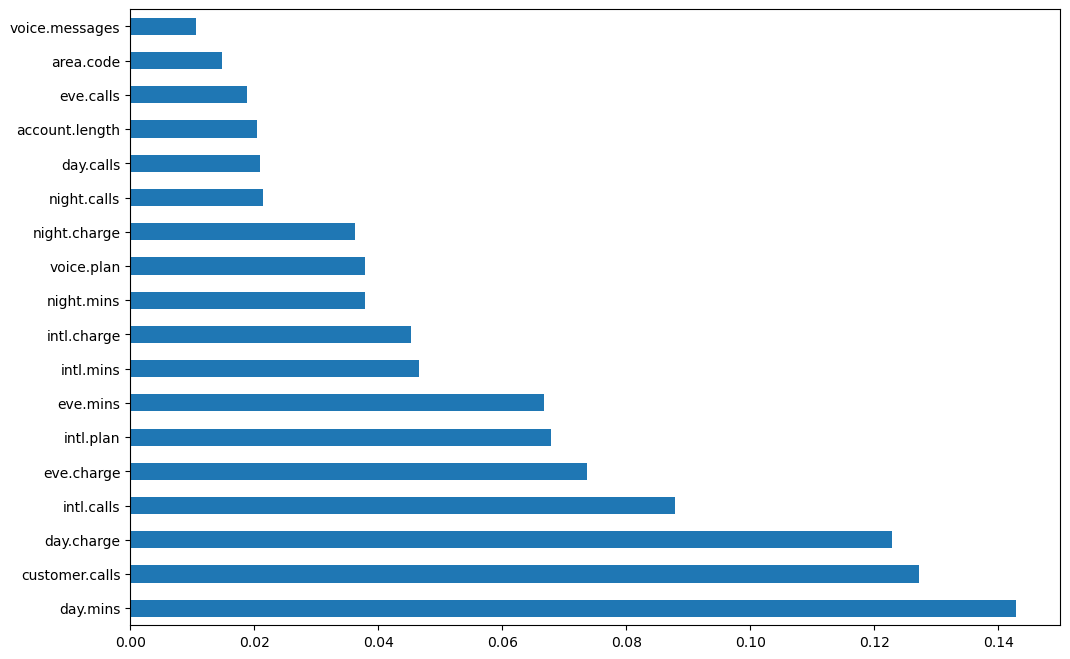

In [46]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model building 

In [47]:
# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
X_train.shape

(3500, 18)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [50]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)


# Predicting Train and Test data 
logreg_prediction = logreg_clf.predict(X_test)
logreg_train_pred = logreg_clf.predict(X_train)



# Model Evaulation

In [51]:
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(logreg_train_pred, Y_train)))
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

 Train Accuracy 85.91%
 Test Accuracy 85.87%
[[1277  191]
 [  21   11]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1468
           1       0.05      0.34      0.09        32

    accuracy                           0.86      1500
   macro avg       0.52      0.61      0.51      1500
weighted avg       0.96      0.86      0.91      1500



# Hyper parameter using Gird Serach 

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values to search
param_grid = {
    'C': [0.1, 1, 10],                   # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear'],    # Solver algorithms
    'max_iter': [100, 200, 300],         # Maximum number of iterations
    'penalty': ['l1', 'l2'],             # Regularization type
}

In [53]:
# Create GridSearchCV instance with logistic regression model and hyperparameter grid
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance on the data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [54]:
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8646


In [55]:
# Predicting Train and Test data 
grid_search_prediction = grid_search.predict(X_test)
grid_search_train_pred = grid_search.predict(X_train)

print("Train Accuracy {0:.2f}%".format(100*accuracy_score(grid_search_train_pred, Y_train)))
print("Test Accuracy {0:.2f}%".format(100*accuracy_score(grid_search_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(grid_search_prediction, Y_test))
print(classification_report(grid_search_prediction, Y_test))

Train Accuracy 86.46%
Test Accuracy 86.87%
[[1266  165]
 [  32   37]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1431
           1       0.18      0.54      0.27        69

    accuracy                           0.87      1500
   macro avg       0.58      0.71      0.60      1500
weighted avg       0.94      0.87      0.90      1500



In [56]:
X_test.iloc[3,:].values

array([  2.  ,  80.  ,   0.  ,   0.  ,   1.  ,   9.4 ,   2.  ,   2.54,
       275.4 ,  89.  ,  46.82, 186.7 ,  66.  ,  15.87, 201.3 ,  87.  ,
         9.06,   0.  ])

In [57]:
grid_search.predict([[  0.  ,  97.  ,   0.  ,   0.  ,   0.  ,  13.  ,   5.  ,   3.51,
        169.2 ,  91.  ,  28.76, 224.6 , 122.  ,  19.09, 108.  , 115.  ,
          4.86,   1.  ]])

array([0], dtype=int64)

In [58]:
grid_search.predict([[  2.  ,  80.  ,   0.  ,   0.  ,   1.  ,   9.4 ,   2.  ,   2.54,
        275.4 ,  89.  ,  46.82, 186.7 ,  66.  ,  15.87, 201.3 ,  87.  ,
          9.06,   0. ]])

array([1], dtype=int64)

# Random Forest Classification

In [59]:
# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier()
ranfor_model = ranfor_clf.fit(X_train, Y_train)


# Predicting Train and Test data 
ranfor_prediction = ranfor_clf.predict(X_test)
ranfor_train_pred = ranfor_clf.predict(X_train)

print("Train Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Test Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Train Accuracy 100.00%
Test Accuracy 96.60%
[[1296   49]
 [   2  153]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1345
           1       0.76      0.99      0.86       155

    accuracy                           0.97      1500
   macro avg       0.88      0.98      0.92      1500
weighted avg       0.97      0.97      0.97      1500



# Hyper parameter Tuning

RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [61]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations


In [62]:
rf_random = RandomizedSearchCV(estimator =ranfor_model,  param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [63]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [65]:
# Predicting Train and Test data 
ranfor_prediction = rf_random.predict(X_test)
ranfor_train_pred = rf_random.predict(X_train)

print("Train Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Test Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Train Accuracy 100.00%
Test Accuracy 96.47%
[[1295   50]
 [   3  152]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1345
           1       0.75      0.98      0.85       155

    accuracy                           0.96      1500
   macro avg       0.88      0.97      0.92      1500
weighted avg       0.97      0.96      0.97      1500



In [66]:
rf_random.predict([[  1.  , 240.  ,   5.  ,  25.  ,   0.  ,  10.  ,   3.  ,   2.7 ,
        265.1 , 110.  ,  95.07, 197.4 ,  99.  ,  16.78, 244.7 ,  91.  ,
         11.01,   1.  ]])

array([0], dtype=int64)

In [67]:
rf_random.predict([[  2.  ,  80.  ,   0.  ,   0.  ,   1.  ,   9.4 ,   2.  ,   2.54,
        275.4 ,  89.  ,  46.82, 186.7 ,  66.  ,  15.87, 201.3 ,  87.  ,
          9.06,   0.  ]])

array([1], dtype=int64)

In [68]:
rf_random.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,